<a href="https://colab.research.google.com/github/jvtesteves/Dimensionality_reduction/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Conversion to Grayscale and Binarization

This notebook demonstrates how to:
1. **Load** a JPEG image (using the Pillow library).
2. **Convert** the image to grayscale, pixel by pixel, **without** using any built-in conversion methods.
3. **Binarize** the image using a threshold, also done manually.
4. **Display** the three resulting images (original, grayscale, and binarized) side by side.

**Note**:  
The only required library here is **Pillow** for reading and writing image files. The entire grayscale and binarization process is performed manually, i.e., we **do not** rely on any built-in library methods for these steps.

In [7]:
# If Pillow (PIL) is not installed in your environment, uncomment the following line:
# !pip install Pillow

from PIL import Image
from IPython.display import display, HTML
import os


In [8]:
def convert_to_grayscale_and_binary(image_path, threshold=128):
    """
    Reads an image from 'image_path' (JPEG, PNG, etc.),
    converts it to grayscale, and then to black and white (binarized).
    Returns two Pillow Image instances: grayscale_img and binarized_img.

    The conversion and binarization steps are done manually, pixel by pixel.
    """
    # 1) Open the image and convert it to RGB so we have 3 channels (R, G, B).
    img = Image.open(image_path).convert('RGB')
    width, height = img.size

    # 2) Create two new images: one for the grayscale and another for the binary result
    grayscale_img = Image.new('L', (width, height))  # mode 'L' = 8 bits, grayscale
    binarized_img = Image.new('L', (width, height))

    # 3) Iterate over each pixel, do the conversion, and set the values in the new images
    for x in range(width):
        for y in range(height):
            r, g, b = img.getpixel((x, y))

            # Grayscale conversion formula (NTSC)
            gray_value = int(0.299*r + 0.587*g + 0.114*b)

            # Set the pixel in the grayscale image
            grayscale_img.putpixel((x, y), gray_value)

            # Apply the threshold for binarization
            if gray_value >= threshold:
                bin_value = 255
            else:
                bin_value = 0

            # Set the pixel in the binary (black and white) image
            binarized_img.putpixel((x, y), bin_value)

    return grayscale_img, binarized_img


Output images have been successfully generated:
 - gray_output.png
 - binary_output.png


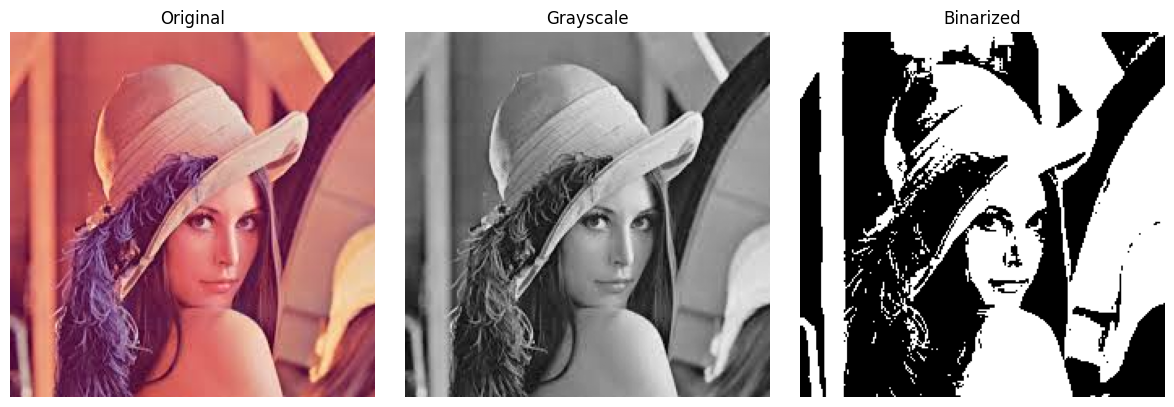

In [9]:
import matplotlib.pyplot as plt

# Define the path to your image. If it's located in the same directory as the notebook,
# you can simply specify the file name, e.g., "lena.jpeg".
image_path = "/content/lena.jpeg"

# Check if the file exists. If not, adjust the path accordingly.
if not os.path.isfile(image_path):
    raise FileNotFoundError(f"File {image_path} not found. Please verify the path or filename.")

# 1) Obtain the grayscale and binary versions of the image
img_gray, img_bin = convert_to_grayscale_and_binary(image_path, threshold=128)

# 2) Save them to disk (optional)
img_gray.save("gray_output.png")
img_bin.save("binary_output.png")

print("Output images have been successfully generated:")
print(" - gray_output.png")
print(" - binary_output.png")

# 3) Display all three images (original, grayscale, and binary) side by side using matplotlib
img_original = Image.open(image_path)

plt.figure(figsize=(12, 4))

# Subplot (1) - Original
plt.subplot(1, 3, 1)
plt.imshow(img_original)
plt.title("Original")
plt.axis('off')

# Subplot (2) - Grayscale
plt.subplot(1, 3, 2)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# Subplot (3) - Binarized
plt.subplot(1, 3, 3)
plt.imshow(img_bin, cmap='gray')
plt.title("Binarized")
plt.axis('off')

plt.tight_layout()
plt.show()
